In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process

In [3]:
from datagovindia import DataGovIndia
datagovin = DataGovIndia() 

In [4]:
search_data = datagovin.search('rice') 


In [5]:
search_data

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,9ef84268-d588-465a-a308-a864a43d0070,Current Daily Price of Various Commodities fro...,Current Daily Price of Various Commodities fro...,Central,"[state, district, market, commodity, variety, ...","[Ministry of Agriculture and Farmers Welfare, ...",data.gov.in,"[Agriculture, Agricultural Marketing]",2021-08-02T21:19:28+00:00,2024-08-24T04:00:31+00:00
1,35985678-0d79-46b4-9ed6-6f13308a1d24,Variety-wise Daily Market Prices Data of Commo...,Variety-wise Daily Market Prices Data of Commo...,Central,"[State, District, Market, Commodity, Variety, ...","[Ministry of Agriculture and Farmers Welfare, ...",data.gov.in,"[Agriculture, Agricultural Marketing]",2023-09-19T06:43:03+00:00,2024-08-24T00:36:43+00:00
2,1832c7b4-82ef-4734-b2b4-c2e3a38a28d3,Commodity-wise Details of Crops Covered under ...,Commodity-wise Details of Crops Covered under ...,Central,"[document_id, _sl__no_, commodity, variety, _2...",[Rajya Sabha],data.gov.in,[All],2024-08-23T08:08:40+00:00,2024-08-23T08:08:40+00:00
3,ad11fb99-83d3-4c2d-a6f4-a07dd983f6ca,Crop-wise Details of Quantity of Procurement o...,Crop-wise Details of Quantity of Procurement o...,Central,"[document_id, sl__no, crops, _2018_19, _2019_2...",[Rajya Sabha],data.gov.in,[All],2024-08-23T07:45:31+00:00,2024-08-23T07:45:31+00:00
4,7941837a-8f84-4430-b31b-00dd9dba875f,Crop-wise Number of Quantity of Procurement of...,Crop-wise Number of Quantity of Procurement of...,Central,"[document_id, sl__no_, crops, _2018_19, _2019_...",[Rajya Sabha],data.gov.in,[All],2024-08-23T07:44:42+00:00,2024-08-23T07:44:42+00:00
...,...,...,...,...,...,...,...,...,...,...
2991,dae038d5-1e5d-4469-b233-1dd9d04ea3f7,Daily wholesale price of Rice upto April - 2015,Daily wholesale price of Rice upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2992,522e708a-8c44-47d5-80c5-b62bf357f2b8,Daily wholesale price of Onion upto April - 2015,Daily wholesale price of Onion upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2993,8daef6b2-f1c8-4ddf-8b6a-a4353bd4b53e,Weekly wholesale price of Onion upto 2012,Weekly wholesale price of Onion upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2994,d1c6eebd-94e0-4d20-b129-7dd893dc474b,Weekly wholesale price of Tur/Arhar Dal upto 2012,Weekly wholesale price of Tur/Arhar Dal upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00


In [6]:

search_term = " Consumer Affairs"

def find_similar_rows(search_data, column_name, search_term, threshold=80):
    # Create a mapping of index to choice values
    choices = search_data[column_name].tolist()
    index_mapping = {i: choice for i, choice in enumerate(choices)}
    
    # Perform fuzzy matching
    matches = process.extract(search_term, choices, limit=None)
    
    # Debug: Print the matches and scores
    # print("Matches and Scores:")
    # for match in matches:
        # print(match)
    
    # Create a DataFrame from the matches
    matches_df = pd.DataFrame(matches, columns=['match', 'score'])
    
    # Debug: Print the matches DataFrame
    # print("\nMatches DataFrame:")
    # print(matches_df)
    
    # Filter matches above the threshold
    matches_above_threshold = matches_df[matches_df['score'] >= threshold]
    
    # Debug: Print the filtered matches
    # print("\nFiltered Matches Above Threshold:")
    # print(matches_above_threshold)
    
    # Get the original indices of the matching rows
    matching_indices = [i for i, choice in enumerate(choices) if any(match == choice for match, score in matches if score >= threshold)]
    
    # Debug: Print the matching indices
    # print("\nMatching Indices:")
    # print(matching_indices)
    
    # Retrieve rows corresponding to the matching indices
    similar_rows = search_data.iloc[matching_indices]
    return pd.DataFrame(similar_rows)

# Find similar rows
similar_rows_df = find_similar_rows(search_data, 'sectors', search_term)

# print("\nSimilar Rows:")
similar_rows_df

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
889,6c9581ed-2421-4ed0-a186-e33cd5c6706b,Weekly retail price of Atta (Wheat) upto 2012,Weekly retail price of Atta (Wheat) upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Consumer Affairs, Consumer Affairs]",2023-02-16T08:22:29+00:00,2023-02-16T15:32:40+00:00
1104,dc9dcb6c-7fd6-494d-99b3-baad5380addc,Daily wholesale price of Atta (Wheat) upto Apr...,Daily wholesale price of Atta (Wheat) upto Apr...,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-12-08T09:55:31+00:00,2022-12-08T15:52:25+00:00
1105,8b7e1db5-0b1d-4b48-bd87-00005ca9ade5,Weekly wholesale price of Atta (Wheat) upto 2012,Weekly wholesale price of Atta (Wheat) upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-12-08T10:17:42+00:00,2022-12-08T15:52:25+00:00
1109,f8c61bb2-3b00-4c2c-be23-42562de90cee,Weekly retail price of Milk upto 2012,Weekly retail price of Milk upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-11-24T10:26:50+00:00,2022-11-24T15:02:28+00:00
1110,e5e37e68-faed-46bd-b6c2-001cbc633e29,Daily retail price of Milk upto April - 2015,Daily retail price of Milk upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,"[Food, Consumer Affairs]",2022-11-24T10:14:26+00:00,2022-11-24T15:02:27+00:00
2987,b9528b08-05d1-4764-9093-67458558eff2,Weekly wholesale price of Wheat upto 2012,Weekly wholesale price of Wheat upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:13+00:00,2018-05-25T13:03:28+00:00
2988,e2aa7422-c179-43c8-8bc7-a4f0305d360e,Weekly wholesale price of Rice upto 2012,Weekly wholesale price of Rice upto 2012,Central,"[document_id, date, zone, centre, price, resou...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2989,39c1865b-5483-41f6-9c9b-3d32c0d63824,Daily wholesale price of Wheat upto April - 2015,Daily wholesale price of Wheat upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2990,7e6249e9-f1cb-4f58-bc7d-c586f9538c04,Weekly wholesale price of Salt Packed upto 2012,Weekly wholesale price of Salt Packed upto 2012,Central,"[document_id, date, zone, centre, salt_p, reso...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00
2991,dae038d5-1e5d-4469-b233-1dd9d04ea3f7,Daily wholesale price of Rice upto April - 2015,Daily wholesale price of Rice upto April - 2015,Central,"[document_id, date, centre_name, commodity_nam...","[Ministry of Consumer Affairs, Food and Public...",data.gov.in,[Consumer Affairs],2017-05-25T10:55:12+00:00,2018-05-25T13:03:27+00:00


In [7]:
rice_week = datagovin.get_data("e2aa7422-c179-43c8-8bc7-a4f0305d360e")

In [35]:
rice_week.shape

(37588, 4)

In [9]:
rice_week['zone'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [10]:
rice_zone1 = rice_week[rice_week['zone'] == '1']
rice_zone2 = rice_week[rice_week['zone'] == '2']
rice_zone3 = rice_week[rice_week['zone'] == '3']
rice_zone4 = rice_week[rice_week['zone'] == '4']

In [11]:
rice_zone1.loc[rice_zone1['price'] == 'NA', 'price'] = np.nan
rice_zone2.loc[rice_zone2['price'] == 'NA', 'price'] = np.nan
rice_zone3.loc[rice_zone3['price'] == 'NA', 'price'] = np.nan
rice_zone4.loc[rice_zone4['price'] == 'NA', 'price'] = np.nan

/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_9665/1891313355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_zone1.loc[rice_zone1['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_9665/1891313355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_zone2.loc[rice_zone2['price'] == 'NA', 'price'] = np.nan
/var/folders/pq/bmw3qp553sq2x9k4vmz_v7rr0000gn/T/ipykernel_9665/1891313355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [12]:
rice_zone1 = rice_zone1.reset_index(drop=True)
rice_zone2 = rice_zone2.reset_index(drop=True)
rice_zone3 = rice_zone3.reset_index(drop=True)
rice_zone4 = rice_zone4.reset_index(drop=True)

In [13]:
rice_zone1['date'] = pd.to_datetime(rice_zone1['date'], format='%d-%m-%y')
rice_zone2['date'] = pd.to_datetime(rice_zone2['date'], format='%d-%m-%y')
rice_zone3['date'] = pd.to_datetime(rice_zone3['date'], format='%d-%m-%y')
rice_zone4['date'] = pd.to_datetime(rice_zone4['date'], format='%d-%m-%y')

In [36]:
rice_zone1['price'].isnull().sum()

np.int64(2081)

In [15]:
print(rice_zone1.dtypes)

date      datetime64[ns]
zone              object
centre            object
price             object
dtype: object


In [16]:
rice_zone1['price'] = pd.to_numeric(rice_zone1['price'], errors='coerce')
rice_zone2['price'] = pd.to_numeric(rice_zone2['price'], errors='coerce')
rice_zone3['price'] = pd.to_numeric(rice_zone3['price'], errors='coerce')
rice_zone4['price'] = pd.to_numeric(rice_zone4['price'], errors='coerce')

In [22]:
rice_zone1_average_prices = rice_zone1.groupby('date')['price'].mean().reset_index().round(2)
rice_zone2_average_prices = rice_zone2.groupby('date')['price'].mean().reset_index().round(2)
rice_zone3_average_prices = rice_zone3.groupby('date')['price'].mean().reset_index().round(2)
rice_zone4_average_prices = rice_zone4.groupby('date')['price'].mean().reset_index().round(2)

In [37]:
rice_zone4_average_prices.shape

(1025, 2)

In [28]:
#if Need

# import os


# directory = 'dataset/rice/'

# os.makedirs(directory, exist_ok=True)


In [29]:
rice_zone1_average_prices.to_csv('../dataset/rice/rice_zone1_average_prices.csv', sep=',', index=False, encoding='utf-8')
rice_zone2_average_prices.to_csv('../dataset/rice/rice_zone2_average_prices.csv', sep=',', index=False, encoding='utf-8')
rice_zone3_average_prices.to_csv('../dataset/rice/rice_zone3_average_prices.csv', sep=',', index=False, encoding='utf-8')
rice_zone4_average_prices.to_csv('../dataset/rice/rice_zone4_average_prices.csv', sep=',', index=False, encoding='utf-8')

<Axes: xlabel='date', ylabel='price'>

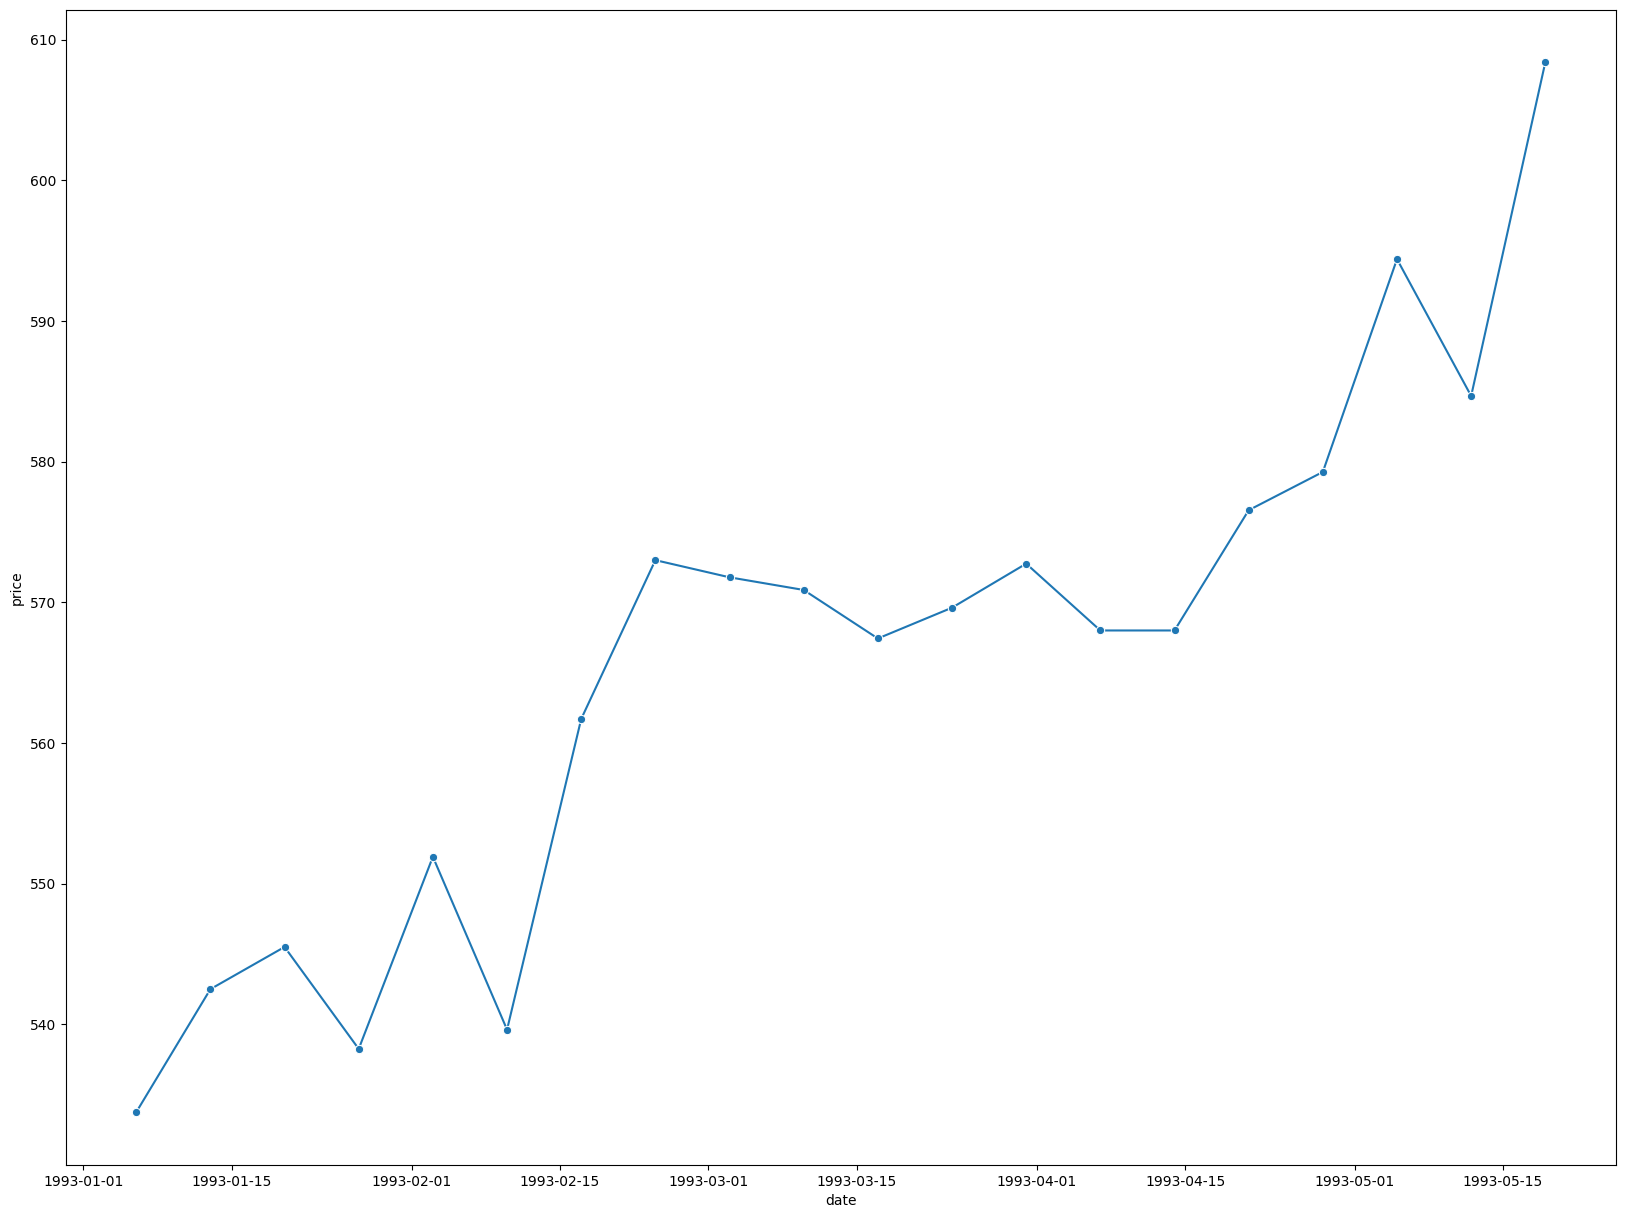

In [30]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=rice_zone1_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

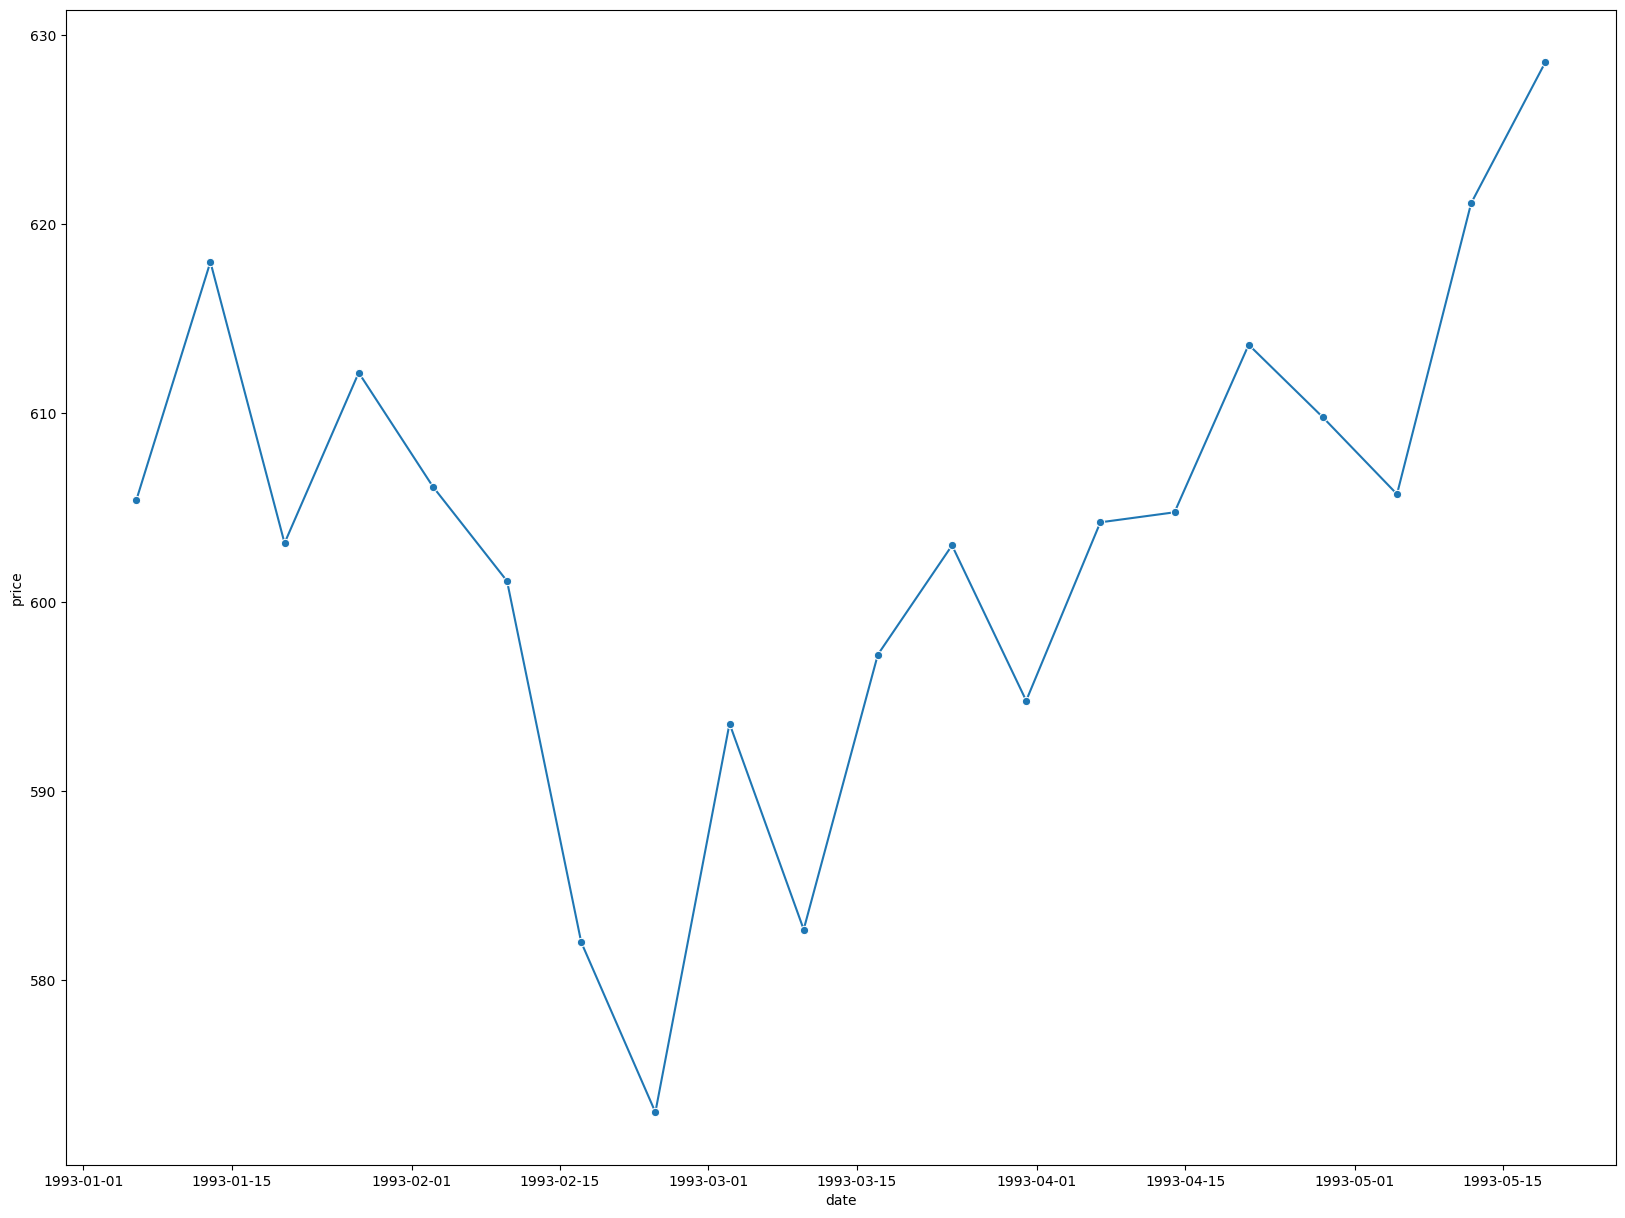

In [31]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=rice_zone2_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

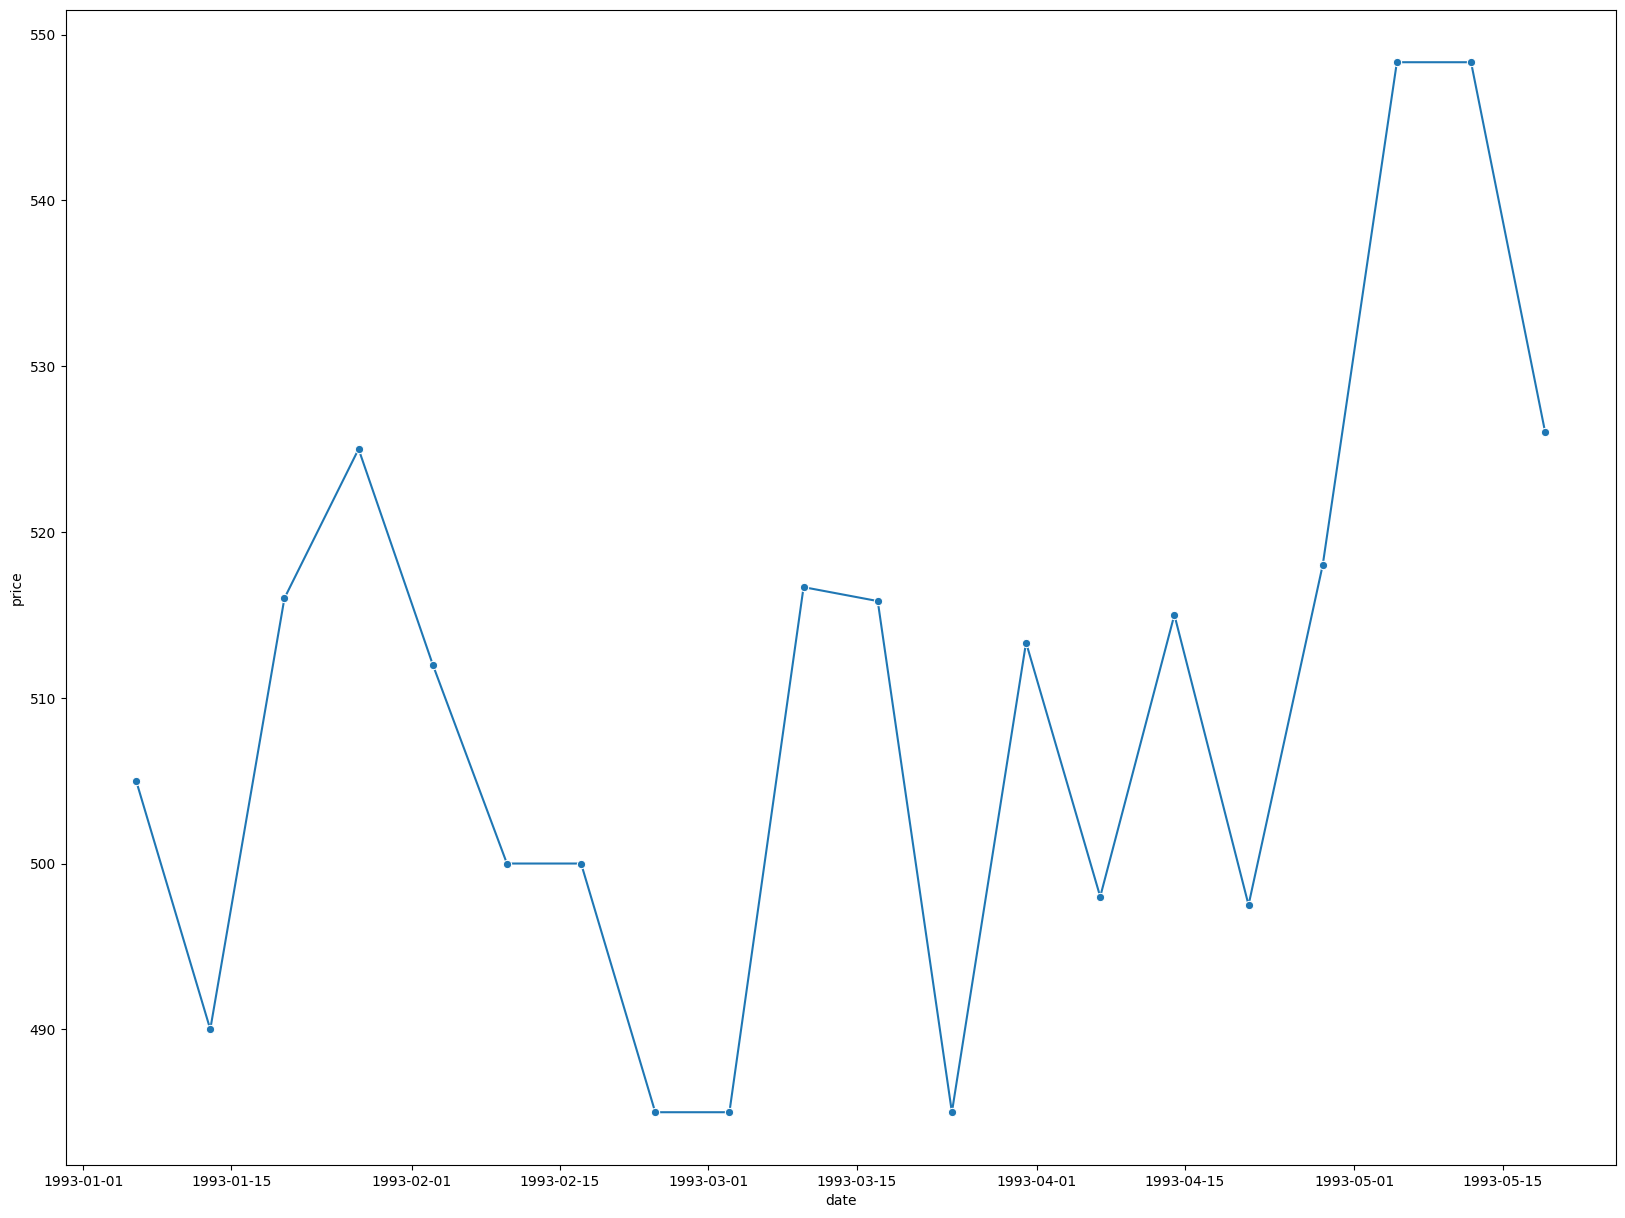

In [32]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=rice_zone3_average_prices[:20], marker='o')

<Axes: xlabel='date', ylabel='price'>

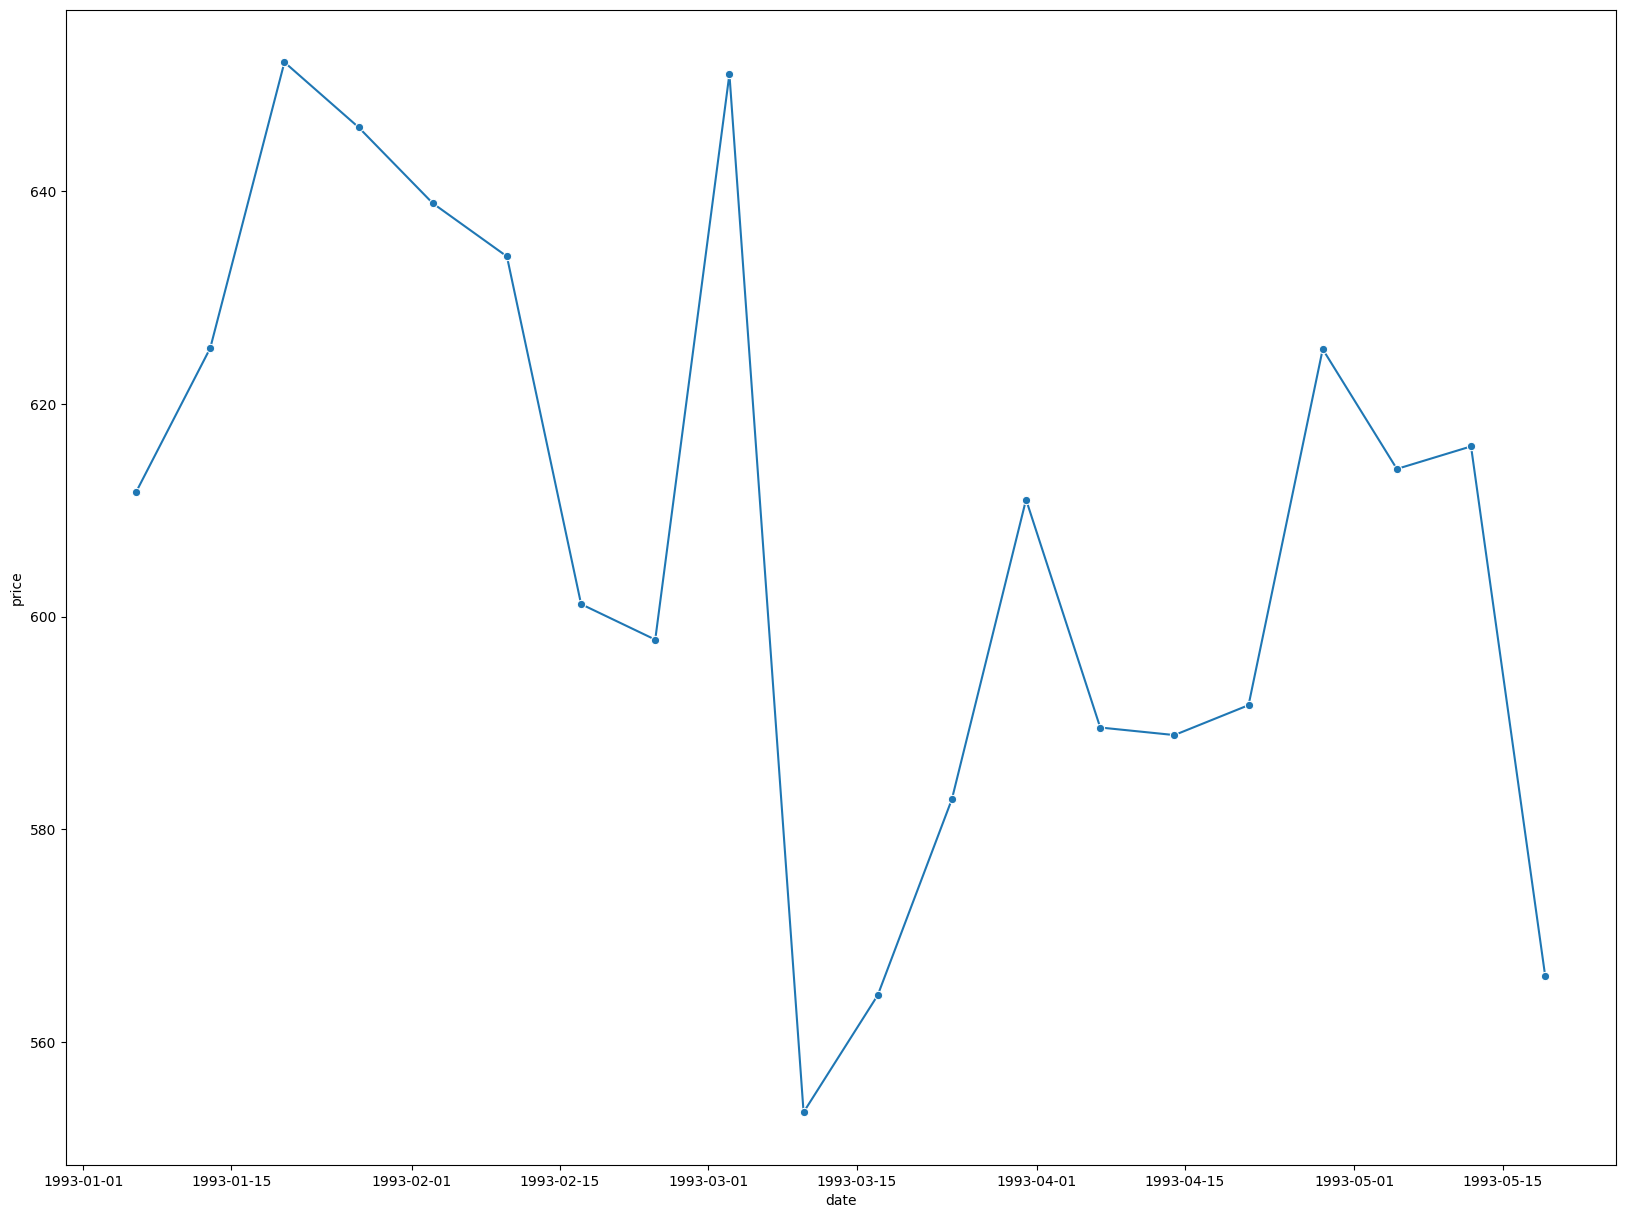

In [33]:
plt.figure(figsize=(20, 15))
sns.lineplot(x='date', y='price', data=rice_zone4_average_prices[:20], marker='o')

# End -- Rice Weekly